In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("layoff.csv")
df

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,99,Sao Paulo,Transportation,75.0,0.02,20-09-2022,Acquired,Brazil,244.0
1,E Inc.,Toronto,Transportation,NaN,NaN,16-12-2022,Post-IPO,Canada,NaN
2,Included Health,SF Bay Area,Healthcare,NaN,0.06,25-07-2022,Series E,United States,272.0
3,#Paid,Toronto,Marketing,19.0,0.17,27-01-2023,Series B,Canada,21.0
4,&Open,Dublin,Marketing,9.0,0.09,17-11-2022,Series A,Ireland,35.0
...,...,...,...,...,...,...,...,...,...
3096,Zymergen,SF Bay Area,Other,80.0,NaN,26-08-2022,Acquired,United States,974.0
3097,Zymergen,SF Bay Area,Other,80.0,NaN,25-07-2022,Acquired,United States,974.0
3098,Zymergen,SF Bay Area,Other,120.0,NaN,23-09-2021,Post-IPO,United States,974.0
3099,Zymergen,SF Bay Area,Other,NaN,0.10,13-05-2020,Series C,United States,574.0


In [5]:
df.head()


,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,99,Sao Paulo,Transportation,75.0,0.02,20-09-2022,Acquired,Brazil,244.0
1,E Inc.,Toronto,Transportation,NaN,NaN,16-12-2022,Post-IPO,Canada,NaN
2,Included Health,SF Bay Area,Healthcare,NaN,0.06,25-07-2022,Series E,United States,272.0
3,#Paid,Toronto,Marketing,19.0,0.17,27-01-2023,Series B,Canada,21.0
4,&Open,Dublin,Marketing,9.0,0.09,17-11-2022,Series A,Ireland,35.0


In [6]:
df.shape

(3101, 9)

In [7]:
df.isna().sum()

company                   0
location                  1
industry                  1
total_laid_off         1030
percentage_laid_off    1087
date                      0
stage                     7
country                   0
funds_raised            322
dtype: int64

In [8]:
#Lets fix some issues with the data here
#Lets drop some columns and fix some NaN values in dataset

df.total_laid_off = df.total_laid_off.fillna(1) # lets assume there must be atleast 1 reported layoff in any company in this dataset
df.industry = df.industry.fillna('Unknown')
df.total_laid_off = df.total_laid_off.astype(int) # layoffs should be whole numbers not floats

In [9]:
df.isna().sum()

company                   0
location                  1
industry                  0
total_laid_off            0
percentage_laid_off    1087
date                      0
stage                     7
country                   0
funds_raised            322
dtype: int64

# Lets analyse data now

# Top 5 countries affected by layoffs

<Axes: >

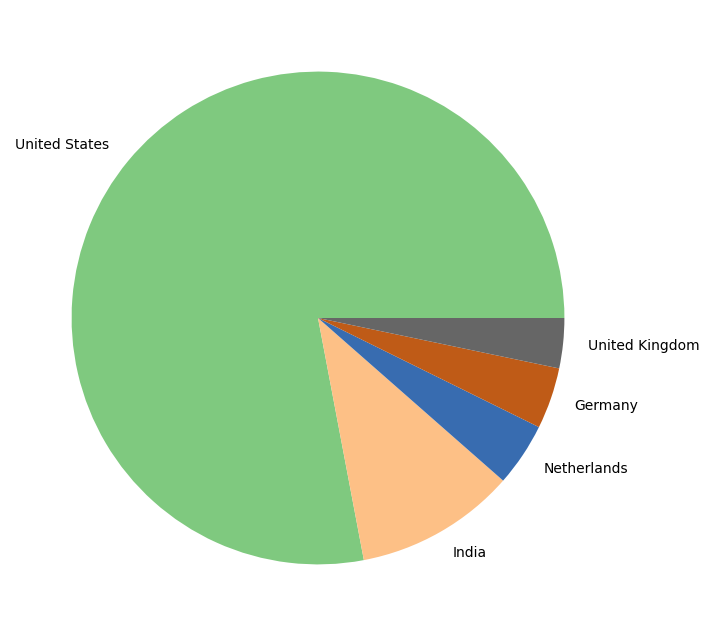

In [10]:
df.groupby('country')['total_laid_off'].sum().sort_values(ascending=False).head().plot(ylabel="", figsize=(8,8), kind='pie', stacked=True, colormap='Accent')

In [11]:
#This shows that United States is unproportionally affected by layoffs, compared to the rest of the world

Top 5 industries affected by layoffs world wide¶

<Axes: >

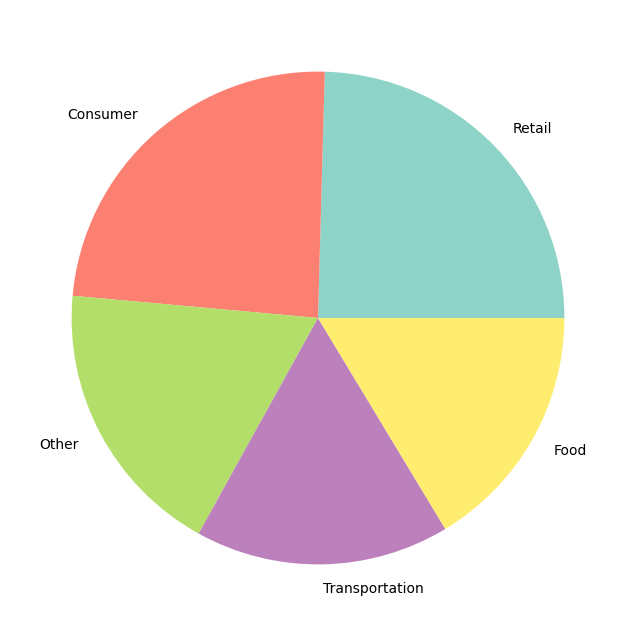

In [12]:
df.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head().plot(ylabel="",figsize=(8,8), kind='pie', stacked=True, colormap='Set3')

Top 5 locations affected by layoffs world wide

<Axes: >

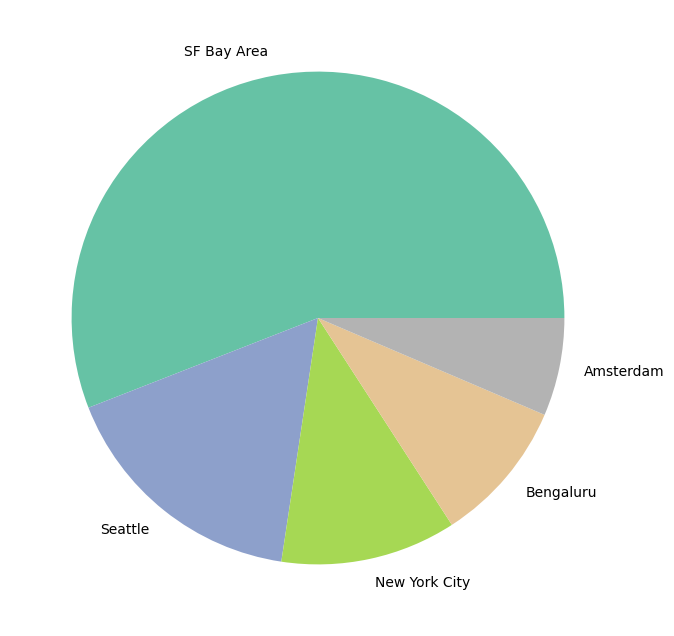

In [13]:
df.groupby('location')['total_laid_off'].sum().sort_values(ascending=False).head().plot(ylabel="",figsize=(8,8), kind='pie', stacked=True, colormap='Set2')

In [14]:
#So "SF Bay Area" suffers badly with layoffs.

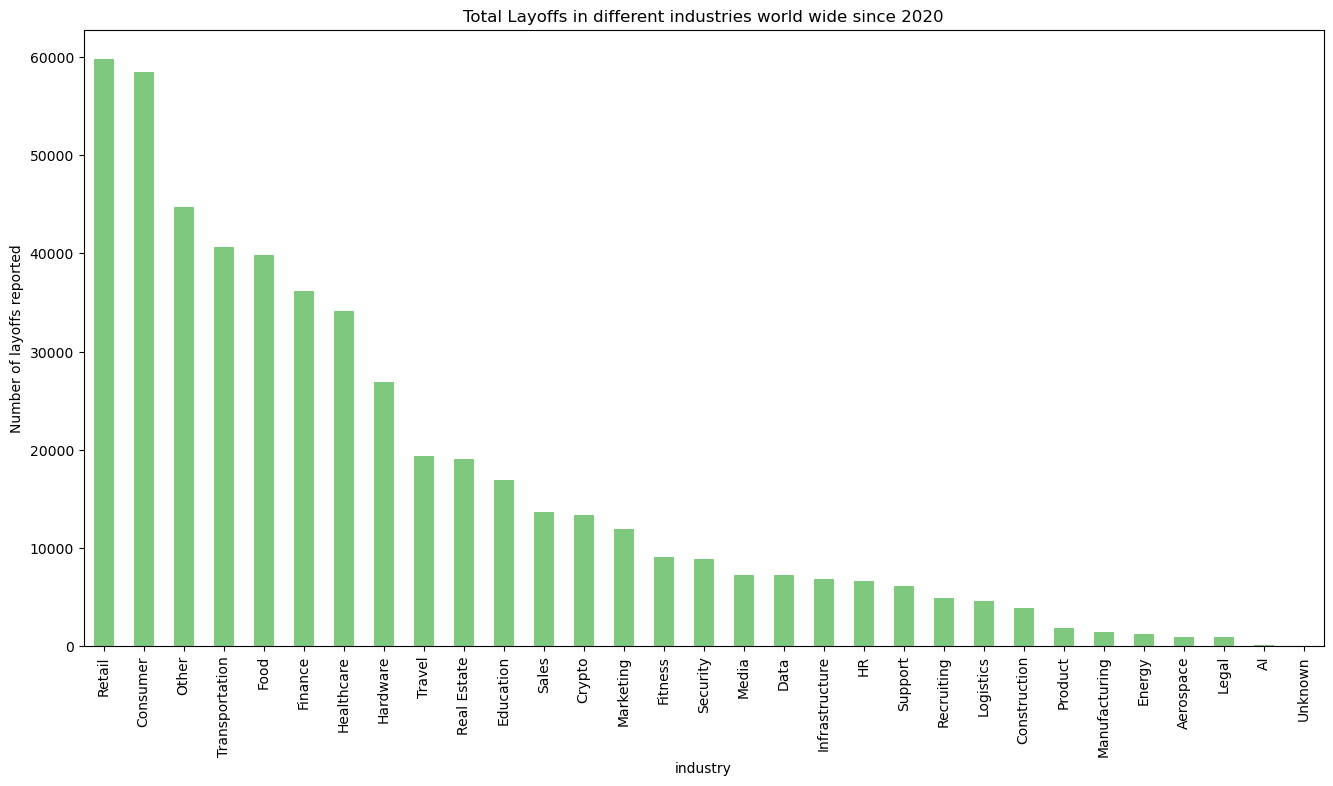

In [15]:
plt.figure(figsize=(10, 6))
plt.title("Total Layoffs in different industries world wide since 2020")
plt.ylabel("Number of layoffs reported")
df_industries = df.groupby('industry').sum()['total_laid_off'].sort_values(ascending=False).plot(figsize=(16,8), kind='bar', stacked=True, colormap='Accent')

In [16]:
import warnings
warnings.filterwarnings('ignore')
df_2022 = df.loc[:'2022']

#df = df.set_index('date')

#df_2021 = df.loc[(df.index > '01-01-2021')&(df.index < '01-01-2022')]
#df_2020 = df.loc[(df.index > '01-01-2020')&(df.index < '01-01-2021')]

# Year 2022 - Top 5 companies that laid off their employees

In [17]:
df_2022_most_layoffs = df_2022.sort_values(by='total_laid_off', ascending=False)
df_2022_most_layoffs.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
1139,Google,SF Bay Area,Consumer,12000,0.06,20-01-2023,Post-IPO,United States,26.0
1690,Meta,SF Bay Area,Consumer,11000,0.13,09-11-2022,Post-IPO,United States,26000.0
101,Amazon,Seattle,Retail,10000,0.03,16-11-2022,Post-IPO,United States,108.0
1689,Meta,SF Bay Area,Consumer,10000,NaN,14-03-2023,Post-IPO,United States,26000.0
1701,Microsoft,Seattle,Other,10000,0.05,18-01-2023,Post-IPO,United States,1.0


# Year 2021 - Top 5 companies that laid off their employees

In [18]:
df_2021 = df.loc[:'2021']

In [19]:
df_2021_most_layoffs = df_2021.sort_values(by='total_laid_off', ascending=False
                                          )
df_2021_most_layoffs.head(5)

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
1139,Google,SF Bay Area,Consumer,12000,0.06,20-01-2023,Post-IPO,United States,26.0
1690,Meta,SF Bay Area,Consumer,11000,0.13,09-11-2022,Post-IPO,United States,26000.0
101,Amazon,Seattle,Retail,10000,0.03,16-11-2022,Post-IPO,United States,108.0
1689,Meta,SF Bay Area,Consumer,10000,NaN,14-03-2023,Post-IPO,United States,26000.0
1701,Microsoft,Seattle,Other,10000,0.05,18-01-2023,Post-IPO,United States,1.0


# Year 2020 - Top 5 companies that laid off their employees

In [20]:
df_2020 = df.loc[:'2020']

In [21]:
df_2020_most_layoffs = df_2020.sort_values(by='total_laid_off', ascending=False)
df_2020_most_layoffs.head()


,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
1139,Google,SF Bay Area,Consumer,12000,0.06,20-01-2023,Post-IPO,United States,26.0
1690,Meta,SF Bay Area,Consumer,11000,0.13,09-11-2022,Post-IPO,United States,26000.0
101,Amazon,Seattle,Retail,10000,0.03,16-11-2022,Post-IPO,United States,108.0
1701,Microsoft,Seattle,Other,10000,0.05,18-01-2023,Post-IPO,United States,1.0
1689,Meta,SF Bay Area,Consumer,10000,NaN,14-03-2023,Post-IPO,United States,26000.0


<Axes: title={'center': '2022 layoffs by industry world wide'}, xlabel='industry', ylabel='No of layoffs'>

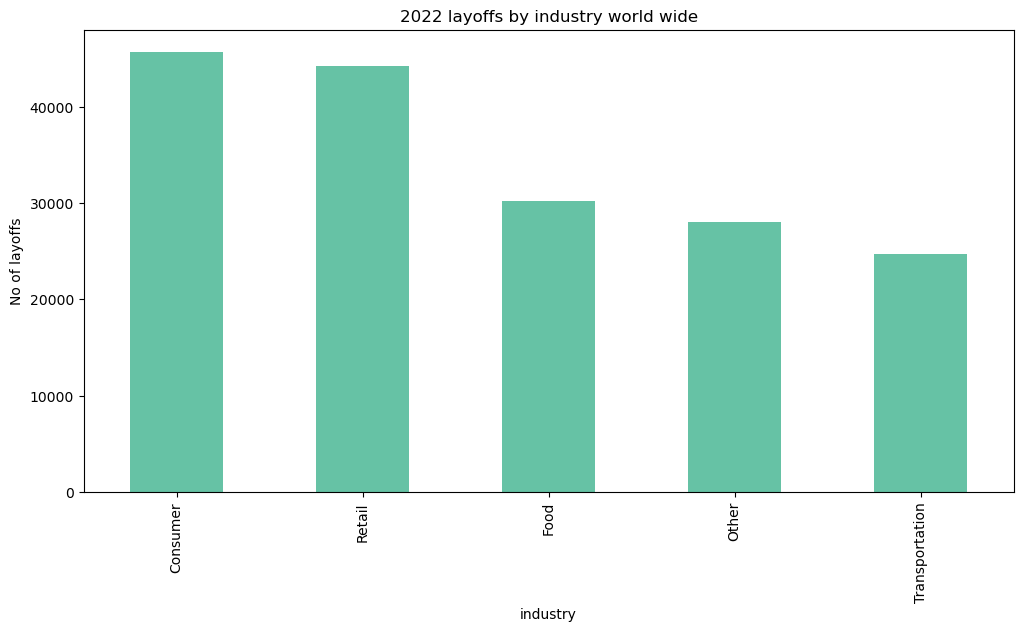

In [22]:
df_2022.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head().plot(title ="2022 layoffs by industry world wide" ,ylabel="No of layoffs", figsize=(12,6), kind='bar', stacked=True, colormap='Set2')

<Axes: title={'center': '2021 layoffs by industry world wide'}, xlabel='industry', ylabel='No of layoffs'>

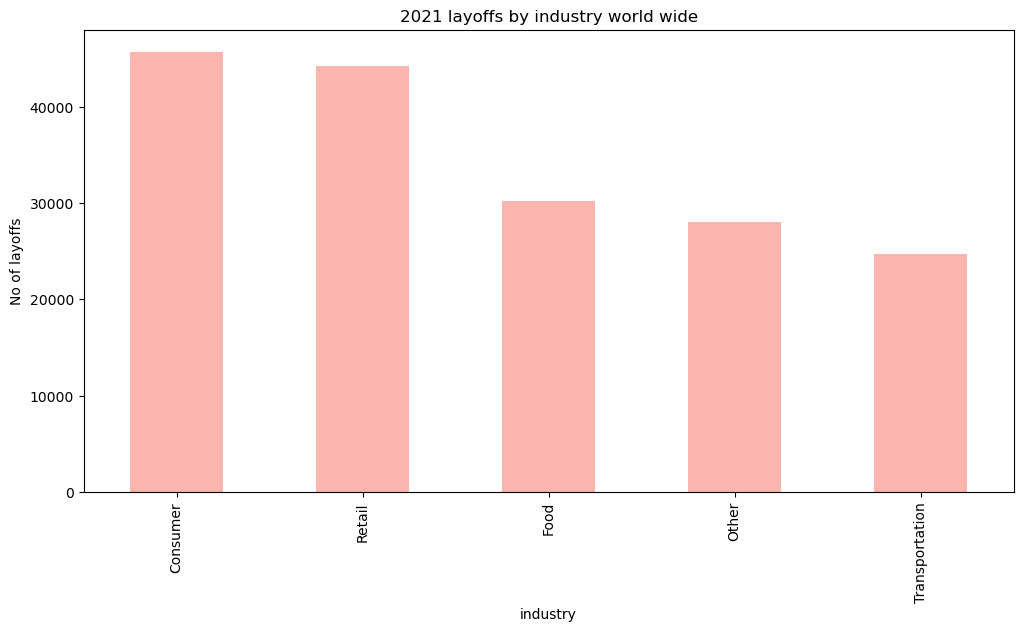

In [23]:
df_2021.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head().plot(title ="2021 layoffs by industry world wide" ,ylabel="No of layoffs", figsize=(12,6), kind='bar', stacked=True, colormap='Pastel1')

<Axes: title={'center': '2020 layoffs by industry world wide'}, xlabel='industry', ylabel='No of layoffs'>

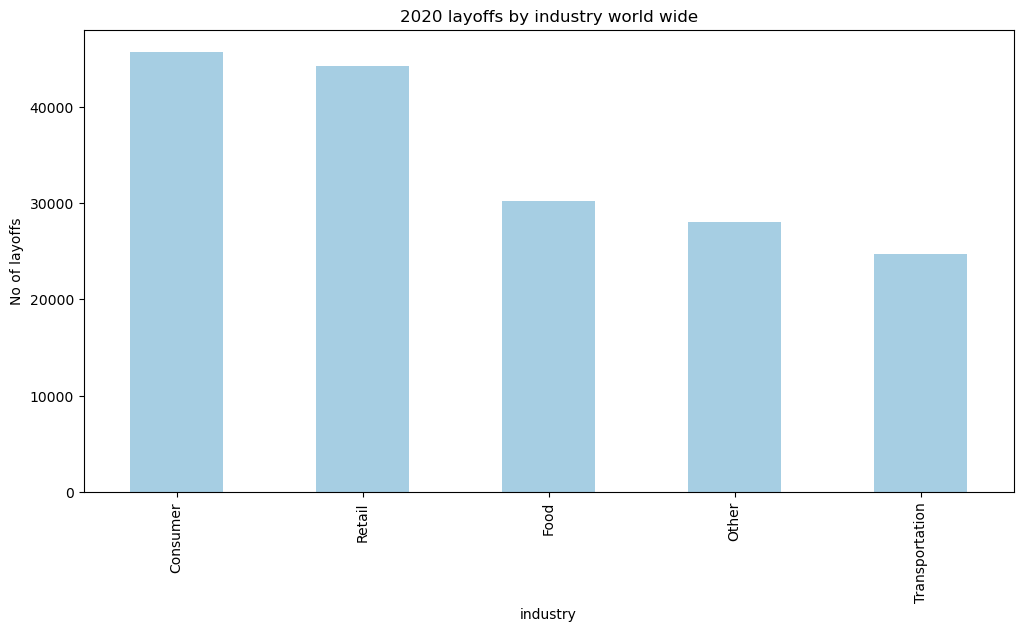

In [24]:
df_2020.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head().plot(title ="2020 layoffs by industry world wide" ,ylabel="No of layoffs", figsize=(12,6), kind='bar', stacked=True, colormap='Paired')

In [25]:
df = df.reset_index()
df['date'] = pd.to_datetime(df['date'])
df_industry = df.groupby([ df.industry, df.date.dt.year]).sum()
# df_industry.sort_values(by=['total_laid_off','date'], ascending=False)

In [26]:
df_industry = df_industry.reset_index()

<Axes: title={'center': 'Yearly layoffs in various industries world wide'}, xlabel='industry', ylabel='total_laid_off'>

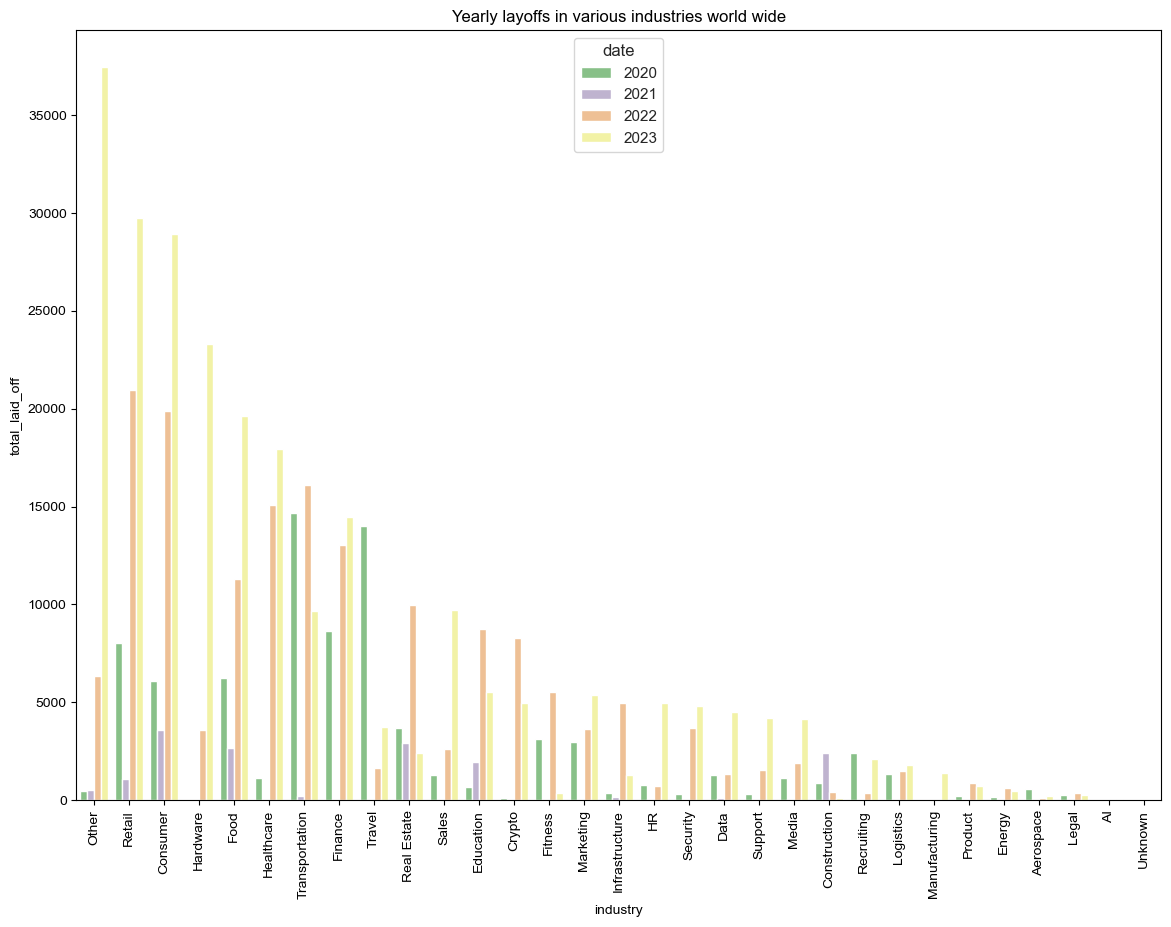

In [27]:
plt.figure(figsize=(14, 10))
plt.xticks(rotation=90)
plt.title("Yearly layoffs in various industries world wide")
sns.set(style="white", palette="Accent", color_codes=True)

sns.barplot(data=df_industry.sort_values(by=['total_laid_off','date'], ascending=False), x="industry", y="total_laid_off", hue="date")

# Yearly layoff trend for the whole world shows that
Layoffs were generally higher in 2020, then they dropped in 2021 and skyrocketed in 2022
Initially Transportation and Travel industries got affected more as shown by the layoffs in 2020 but they somewhat recovered later
Retail, Consumer and Food industries face sharp increase in layoffs

In [28]:
df_usa = df[df['country']=="United States"]
df_minus_usa = df[df['country']!="United States"]

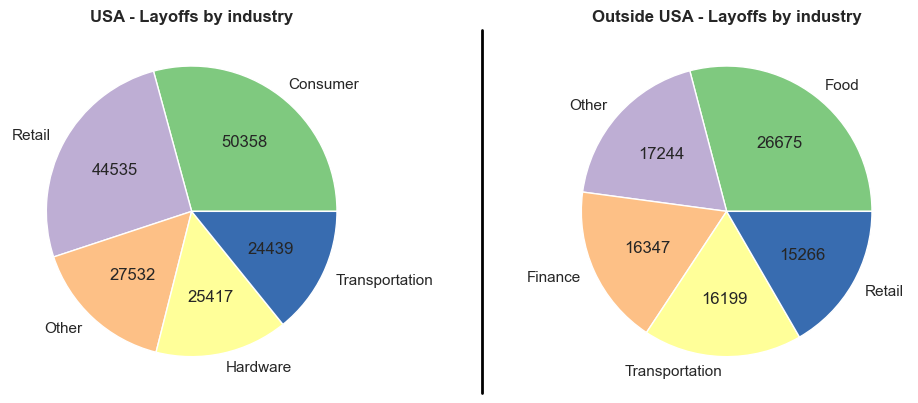

In [29]:
# isolate data to be plotted
d1 = df_usa.groupby("industry")['total_laid_off'].sum().sort_values(ascending=False).head()
d2 = df_minus_usa.groupby("industry")['total_laid_off'].sum().sort_values(ascending=False).head()

# create subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.tight_layout(rect=(0,0,1.3,1.2))
fig.tight_layout(rect=(0,0,1.7,0.9))

# set titles for each subplot
ax1.set_title("USA - Layoffs by industry", fontweight='bold')
ax2.set_title("Outside USA - Layoffs by industry", fontweight='bold')

# plot a pie chart for each data series
ax1.pie(x=d1,labels=d1.index, autopct=lambda x: '{:.0f}'.format(x*d1.values.sum()/100))
ax2.pie(x=d2,labels=d2.index, autopct=lambda x: '{:.0f}'.format(x*d2.values.sum()/100))
# insert line between subplots
ax1.plot([1.3, 1.3], [0, 1], color='black', lw=2, transform=ax1.transAxes, clip_on=False)

In [30]:
df_usa_industry_yearly = df_usa.groupby([ df_usa.industry, df_usa.date.dt.year]).sum()

In [31]:
df_usa_industry_yearly = df_usa_industry_yearly.reset_index()

<Axes: title={'center': 'USA - Yearly layoffs in various industries'}, xlabel='industry', ylabel='total_laid_off'>

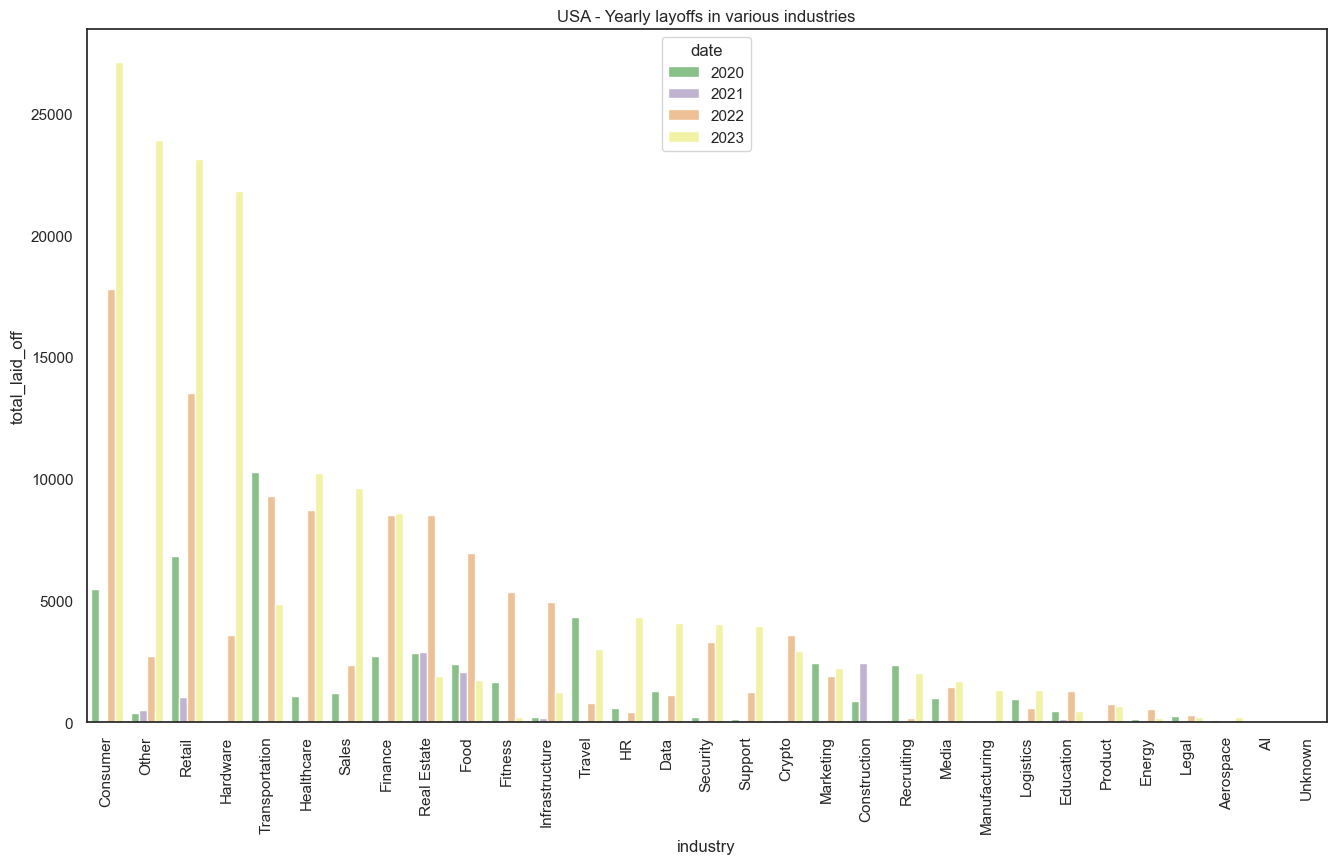

In [32]:
plt.figure(figsize=(16, 9))
plt.xticks(rotation=90)
plt.title("USA - Yearly layoffs in various industries")
sns.set(style="white", palette="Accent", color_codes=True)

sns.barplot(data=df_usa_industry_yearly.sort_values(by=['total_laid_off','date'], ascending=False), x="industry", y="total_laid_off", hue="date")

# Yearly layoff trend for United States shows that
1. Layoffs were generally higher in 2020, then they dropped in 2021 and skyrocketed in 2022

2. Initially Transportation and Travel industries got affected more as shown by the layoffs in 2020 but they somewhat recovered later

3. Consumer, Retail, Real Estate, Healthcare, Food and Fitness industries face sharp increase in layoffs in 2022 compared to 2020

4. Yearly layoff trend for the whole world matches with that of yearly trend in USA in the sense that layoffs were higher in 2020, then they dropped in 2021 and skyrocketed in 2022. This may be because majority of data in the dataset is about USA

# Lets exclude USA from this graph and see the results

In [33]:
df_minus_usa_industry_yearly = df_minus_usa.groupby([ df_minus_usa.industry, df_minus_usa.date.dt.year]).sum()

In [34]:
df_minus_usa_industry_yearly = df_minus_usa_industry_yearly.reset_index()

<Axes: title={'center': 'Outside USA - Yearly layoffs in various industries'}, xlabel='industry', ylabel='total_laid_off'>

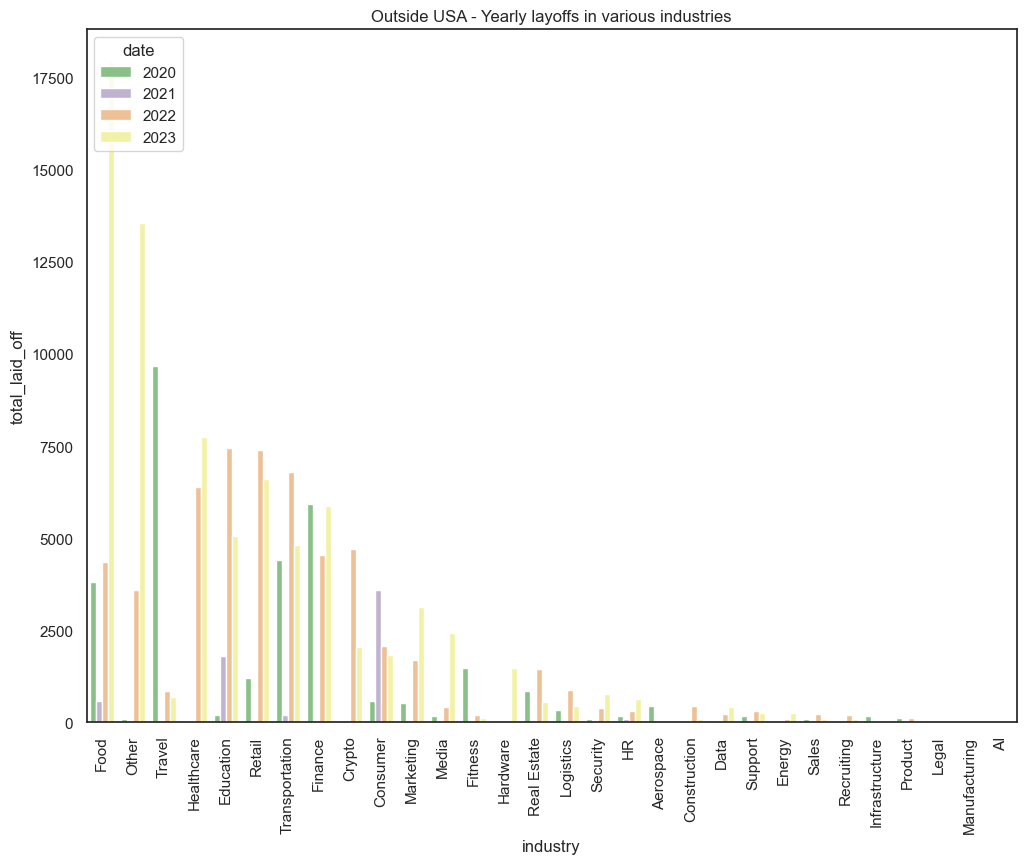

In [35]:
plt.figure(figsize=(12, 9))
plt.xticks(rotation=90)
plt.title("Outside USA - Yearly layoffs in various industries")
sns.set(style="white", palette="Accent", color_codes=True)

sns.barplot(data=df_minus_usa_industry_yearly.sort_values(by=['total_laid_off','date'], ascending=False), x="industry", y="total_laid_off", hue="date")

# Yearly layoff trends excluding United States data shows that
1. Layoffs were generally higher in 2020, then they dropped in 2021 and greatly increased in 2022
2. Initially Travel industry got affected more as shown by the layoffs in 2020 but they recovered very well since then
3. Surprisingly Education and Retail industries faced sharp increase in layoffs in 2022 compared to 2020
4. Travel and Finance industries performed well in 2022 compared to 2020
5. Yearly layoff trend for the whole world (minus USA data) matches somewhat with that of yearly trend in USA in the sense that layoffs were higher in 2020, then they dropped in 2021 and are generally higher in 2022.

# Why so bad situation in Education and Retail industries outside USA?¶

In [36]:
df_minus_usa[df_minus_usa['industry']=='Education'].groupby('country').sum()['total_laid_off'].sort_values(ascending=False).head()

country
India        12789
Canada         614
Brazil         319
Austria        300
Indonesia      202
Name: total_laid_off, dtype: int32

In [37]:
perc = int(100*(df_minus_usa[(df_minus_usa['industry']=='Education') & (df_minus_usa['country']=='India')].sum()['total_laid_off'])/(df_minus_usa[(df_minus_usa['industry']=='Education')].sum()['total_laid_off']))

print("Percent of layoffs by India in Education Industry = ", perc, "%")

Percent of layoffs by India in Education Industry =  87 %


In [38]:
##So in Education Industry, India stands out clearly with 87% of the layoffs reported in this industry

# Lest see how various industies performed yearly in India

In [39]:
df_india = df[df['country']=='India']
df_india_industry_yearly = df_india.groupby([ df_india.industry, df_india.date.dt.year]).sum()
df_india_industry_yearly = df_india_industry_yearly.reset_index()

<Axes: title={'center': 'India - Yearly layoffs in various industries'}, xlabel='industry', ylabel='total_laid_off'>

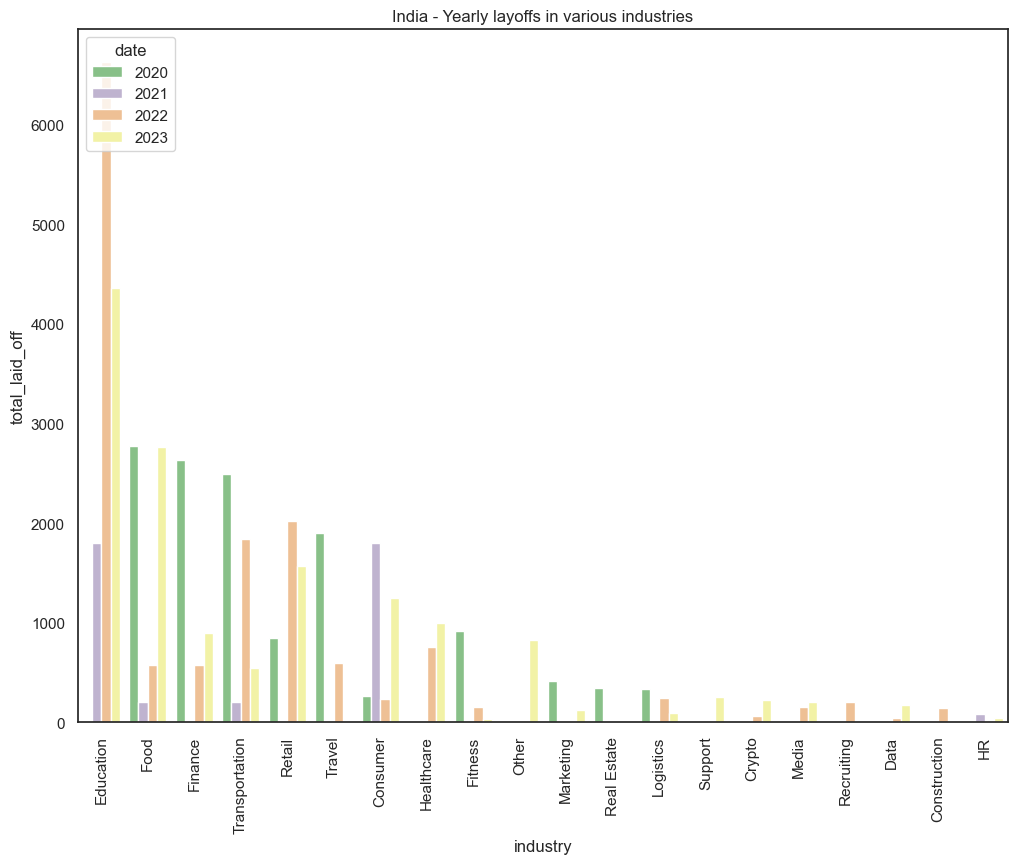

In [40]:
plt.figure(figsize=(12, 9))
plt.xticks(rotation=90)
plt.title("India - Yearly layoffs in various industries")
sns.set(style="white", palette="Accent", color_codes=True)
sns.barplot(data=df_india_industry_yearly.sort_values(by=['total_laid_off','date'], ascending=False), x="industry", y="total_laid_off", hue="date")

This shows

India suffered most layoffs in Education and Retail Industries
India performed well in most industries in 2022 compared to 2021

# Lets remove data about India from the rest of the world and examine the results again

In [41]:
df_minus_usa_india = df_minus_usa[df_minus_usa['country']!='India']
df_minus_usa_india_industry_yearly = df_minus_usa_india.groupby([ df_minus_usa_india.industry, df_minus_usa_india.date.dt.year]).sum()
df_minus_usa_india_industry_yearly = df_minus_usa_india_industry_yearly.reset_index()

<Axes: title={'center': 'World excluding USA & India - Yearly layoffs in various industries'}, xlabel='industry', ylabel='total_laid_off'>

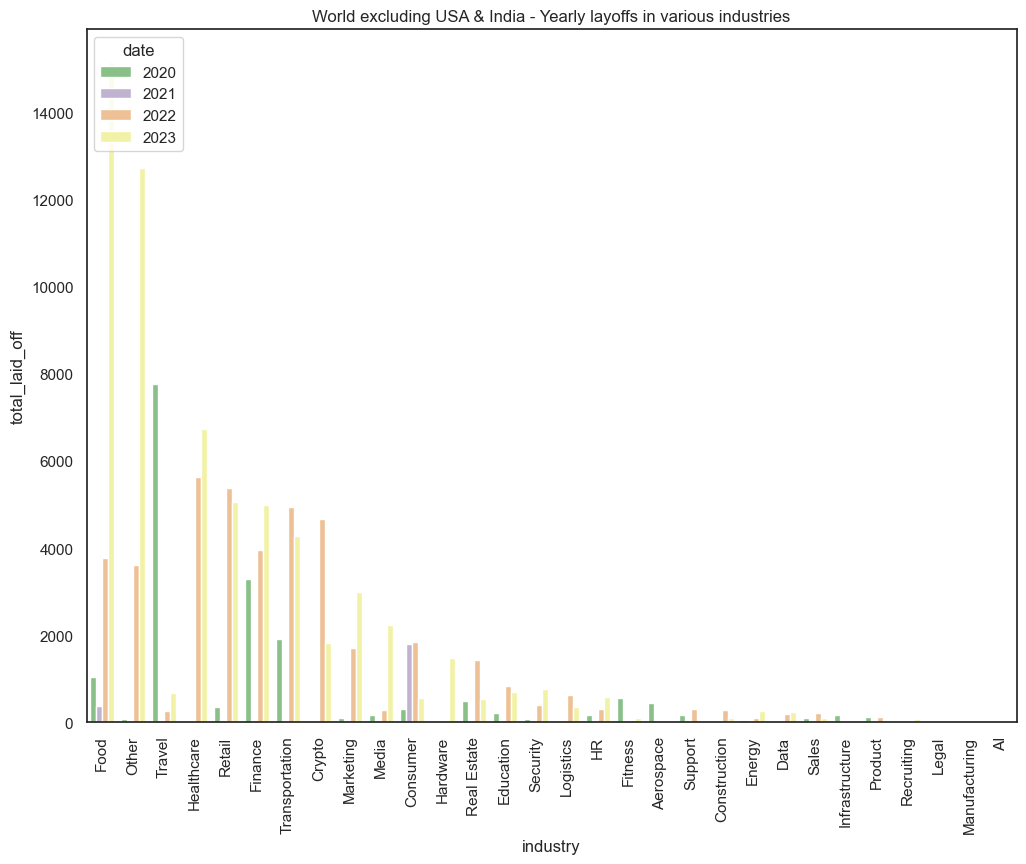

In [42]:
plt.figure(figsize=(12, 9))
plt.xticks(rotation=90)
plt.title("World excluding USA & India - Yearly layoffs in various industries")
sns.set(style="white", palette="Accent", color_codes=True)

sns.barplot(data=df_minus_usa_india_industry_yearly.sort_values(by=['total_laid_off','date'], ascending=False), x="industry", y="total_laid_off", hue="date")

# Yearly layoff trends excluding United States and India data shows that
Travel industry was badly affected by layoffs in 2020 but it improved greatly in 2022
Food, Crypto and Retail industries are badly affected by layoffs in 2022 compared to previous years
Surprisingly consumer industry performed well in 2022 compared to 2021

# Final Analysis
United States suffered most layoffs followed by India, compared to the rest of the world. More than 75% of the employees laid off since 2020 belong to USA
Consumer industry in USA is hit hardest with layoffs in 2022 while Food industry is affected most outside USA in 2022
Transportation and Food industries are affected by layoffs globally
Travel industry faced considerably less layoffs globally in 2022 compared to 2022